## Question 4

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd

## Importing the combined data file

In [2]:
datacomb=pd.read_csv("../Coursework/datacomb.csv")

In [3]:
#Removing the unnamed column  
datacomb = datacomb.iloc[:,1:]

In [4]:
#Checking the first 5 rows of datacomb
datacomb.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0


## Time Data

In [5]:
# Extracting the minutes of the time interval from the CRSDepTime column
Minutes = datacomb.CRSDepTime.astype(str).str[-2:]
Minutes

0           45
1           53
2           15
3           55
4           32
            ..
14595098    05
14595099    51
14595100    25
14595101    15
14595102    00
Name: CRSDepTime, Length: 14595103, dtype: object

In [6]:
# Extracting the hours from the CESDepTime column
Hours = datacomb.CRSDepTime.astype(str).str[:-2]
Hours

0            7
1           10
2           19
3           17
4            8
            ..
14595098    16
14595099    18
14595100    10
14595101    13
14595102    18
Name: CRSDepTime, Length: 14595103, dtype: object

In [7]:
#Converting single digit hour values such as "7" to double digit such as "07"
Hours[Hours == ""] = "0"

In [8]:
#Converting the DayOfMonth column into string
Day = datacomb.DayofMonth.astype(str)
Day = Day.apply(lambda x: '{0:0>2}'.format(x))

In [9]:
#Checking the count of each DayofMonth value in "datacomb"
Day.value_counts()

26    488516
19    487480
12    486069
20    485252
05    484381
16    483693
13    483255
09    482763
06    482099
27    481992
21    481948
17    480650
15    480351
14    480047
18    479871
07    479808
08    479417
10    479249
02    478711
11    477833
28    476091
01    475987
22    475718
25    474527
23    474523
03    472001
24    471814
04    471440
30    442417
29    438749
31    278451
Name: DayofMonth, dtype: int64

In [10]:
#Converting the dates and time into one column as a datetimeformat
datacomb["DateTimeCRSDepTime"] = pd.to_datetime(
            Day.astype(str) + "/" + datacomb.Month.astype(str) + "/" + datacomb.Year.astype(str) + "," + Hours + ":" + Minutes, 
            format='%d/%m/%Y,%H:%M')
#Viewing the DateTimeCRSDepTime column
datacomb["DateTimeCRSDepTime"]

0          2006-01-11 07:45:00
1          2006-01-11 10:53:00
2          2006-01-11 19:15:00
3          2006-01-11 17:55:00
4          2006-01-11 08:32:00
                   ...        
14595098   2007-12-15 16:05:00
14595099   2007-12-15 18:51:00
14595100   2007-12-15 10:25:00
14595101   2007-12-15 13:15:00
14595102   2007-12-15 18:00:00
Name: DateTimeCRSDepTime, Length: 14595103, dtype: datetime64[ns]

In [11]:
#Sorting out the dataset in ascending order by DateTimeCRSDepTime
data=datacomb.sort_values(by='DateTimeCRSDepTime', ascending=True)

In [12]:
#Checking the head of dataframe"data"
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DateTimeCRSDepTime
395866,2006,1,1,7,2357.0,5,655.0,731,NW,336,...,12,0,NaN,0,0,0,0,0,0,2006-01-01 00:05:00
490785,2006,1,1,7,3.0,15,559.0,612,AS,852,...,8,0,NaN,0,0,0,0,0,0,2006-01-01 00:15:00
539419,2006,1,1,7,10.0,15,641.0,653,DL,714,...,14,0,NaN,0,0,0,0,0,0,2006-01-01 00:15:00
503685,2006,1,1,7,40.0,20,828.0,835,B6,484,...,10,0,NaN,0,0,0,0,0,0,2006-01-01 00:20:00
445088,2006,1,1,7,24.0,30,526.0,545,AA,530,...,21,0,NaN,0,0,0,0,0,0,2006-01-01 00:30:00


In [13]:
#Checking the counts of each TailNum in "data"
data.TailNum.value_counts()

0         177944
000000     21644
N308SW      8569
N478HA      8195
N479HA      8079
           ...  
N824\A         1
N228SW         1
N623US         1
N194JB         1
N576SK         1
Name: TailNum, Length: 5817, dtype: int64

In [14]:
#Finding TotalDelay of the plane
data["TotalDelay"] = data.ArrDelay + data.DepDelay

Missing values from the column "TotalDelay" in "data" are removed below

In [15]:
data = data[pd.notnull(data['TotalDelay'])]

In [16]:
#Finding the delays in the previous airport by grouping by TailNum and DateCRSDepTime of a plane and lagging the rows by 1
data["PreviousDelay"] = data.groupby(['TailNum']).shift(-1).TotalDelay

In [18]:
#Checking the first 5 rows of "data"
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DateTimeCRSDepTime,TotalDelay,PreviousDelay
395866,2006,1,1,7,2357.0,5,655.0,731,NW,336,...,NaN,0,0,0,0,0,0,2006-01-01 00:05:00,-44.0,NaN
490785,2006,1,1,7,3.0,15,559.0,612,AS,852,...,NaN,0,0,0,0,0,0,2006-01-01 00:15:00,-25.0,NaN
539419,2006,1,1,7,10.0,15,641.0,653,DL,714,...,NaN,0,0,0,0,0,0,2006-01-01 00:15:00,-17.0,NaN
503685,2006,1,1,7,40.0,20,828.0,835,B6,484,...,NaN,0,0,0,0,0,0,2006-01-01 00:20:00,13.0,NaN
445088,2006,1,1,7,24.0,30,526.0,545,AA,530,...,NaN,0,0,0,0,0,0,2006-01-01 00:30:00,-25.0,NaN


In [18]:
#Checking for missing values in "data"
pd.isnull(data).sum(axis=0)

Year                         0
Month                        0
DayofMonth                   0
DayOfWeek                    0
DepTime                      0
CRSDepTime                   0
ArrTime                      0
CRSArrTime                   0
UniqueCarrier                0
FlightNum                    0
TailNum                      0
ActualElapsedTime            0
CRSElapsedTime               0
AirTime                      0
ArrDelay                     0
DepDelay                     0
Origin                       0
Dest                         0
Distance                     0
TaxiIn                       0
TaxiOut                      0
Cancelled                    0
CancellationCode      14279056
Diverted                     0
CarrierDelay                 0
WeatherDelay                 0
NASDelay                     0
SecurityDelay                0
LateAircraftDelay            0
DateTimeCRSDepTime           0
TotalDelay                   0
PreviousDelay             5811
dtype: i

In [19]:
#Removing missing values from "PreviousDelay" only since we will lose alot of data if we remove the "Cancellationcode" column.(We get missing values in the cancellation code column if the flight isn't cancelled hence we can't remove those rows)
data = data[pd.notnull(data['PreviousDelay'])]

##  Creating a scatter plot to see the relationship between delays of planes in the current airport and delays of the same planes in the previous airport

In [20]:
#Importing the "matplot.lib" library
import matplotlib.pyplot as plt

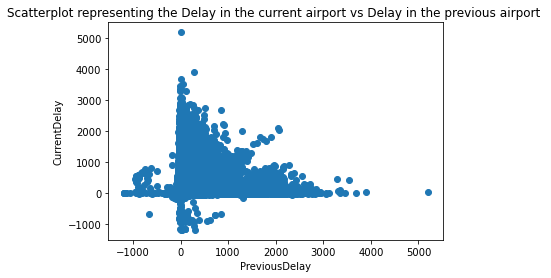

In [21]:
#After removing missing values from "PreviousDelay"
plt.scatter(data["PreviousDelay"], data["TotalDelay"])
plt.xlabel('PreviousDelay')
plt.ylabel('CurrentDelay')
plt.title("Scatterplot representing the Delay in the current airport vs Delay in the previous airport ")
plt.show()

In [22]:
#The places where there is a delay>0, the value is changed to 1 or if not changed to 0
data['HasCurrentDelay'] = np.where(data['TotalDelay'] > 0, 1, 0)
data['HasPreviousDelay'] = np.where(data['PreviousDelay'] > 0, 1, 0)

In [23]:
#Making a crosstab
Crosstab = pd.crosstab(data.HasPreviousDelay, data.HasCurrentDelay, rownames=["Previous Delay"], colnames=["Current Delay"])
Crosstab 

Current Delay,0,1
Previous Delay,,
0,5221893,2390104
1,2390694,4270555


In [25]:
#The Crosstab is made in such a way that it gives us the probabilities of events occuring-this is explained in the report
divisor = Crosstab.sum(axis=1)
Crosstab = Crosstab.divide(divisor, axis=0)
Crosstab

Current Delay,0,1
Previous Delay,,
0,0.686008,0.313992
1,0.358896,0.641104
